# Perceptron com Python, uma introdução

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## O que é Machine Learning?
Machine Learning ou Aprendizado de Máquina é um campo da Engenharia e da Ciência da Computação que consiste na idealização e criação de modelos que permitem ao computador tomar decisões como seres humanos. Um dos algoritmos mais famosos de machine learning é o famoso Perceptron!

![Imagem de Gerd Altmann por Pixabay](https://i.imgur.com/tvyneDp.jpg)
Imagem de Gerd Altmann por Pixabay

## O Perceptron

Inventado em 1957 por Frank Rosenblatt no Cornell Aeronautical Laboratory, o Perceptron é um tipo de rede neural de classificação simples, em outras palavras, é um algoritmo que torna possível separar elementos de grupos que tenham características diferentes e com base nessa separação prever a qual grupo pertencerá elementos não classificados previamente. Como essa rede é uma das mais simples, geralmente ela é usada como porta de entrada do mundo do Machine Learning.


## Como funciona
![Imagem retirada do livro "Python Machine Learning" do Sebastian Raschka](https://i.imgur.com/sYuJUk6.png)
Imagem retirada do livro "Python Machine Learning" do Sebastian Raschka

O Perceptron funciona da seguinte forma: ele recebe entradas (usualmente chamados de inputs) de uma fonte externa, geralmente obtidas por meio de observação, realiza a soma do produto desses dados por pesos, que são aprendidos e otimizados.
![Os pesos são representados por w e os inputs são representados por x](https://i.imgur.com/9Ho7VZo.jpg)
Os pesos são representados por w e os inputs são representados por x

Em seguida, ele passa esse valor encontrado para a função de ativação, que, no caso dele, é uma função binária que testa o valor gerando resultados distintos para cada condição, sendo as condições: maior que o  parâmetro de comparação (1) e menor que o parâmetro (-1). Esse parâmetro de comparação geralmente é chamado de limiar (em inglês, threshold). Por fim, o Perceptron libera como saída (usualmente chamado de output) a previsão.

Para aprender esses pesos, o Perceptron passa por um processo de treinamento.

## Como é feito o treinamento
Para o treinamento do Perceptron é estabelecido uma taxa de aprendizado,  este número representa o quanto o erro vai interferir no aprendizado, e uma taxa de iterações, ou seja, as repetições que serão feitas. A cada iteração, usualmente chamada de época, o erro das previsões é calculado por meio da fórmula:

erro das previsões = taxa de aprendizado * (valor esperado  - previsão)

Os erros calculados anteriormente são utilizados para atualizar o peso das entradas. Suponha que eu tenho um input x e um erro r, para cada x é somado x*r, ou seja, x + x*r. O primeiro input geralmente é o bias (em português, viés).

O Perceptron usa a aprendizagem supervisionada, mas além dela existem outros tipos.

## Tipos de Machine Learning
Existem 3 tipos de Machine Learning:

**Aprendizagem supervisionada:** nela os dados de treinamento possuem rótulos que representam suas características.

**Aprendizagem não supervisionada:** diferente da supervisionada, os dados não possuem rótulos.

**Aprendizagem por Reforço:** essa forma de aprendizado é muito usada para tomada de decisões e geralmente atribui-se recompensas e penalidades ao modelo de acordo com a ação que se quer priorizar.

## Preparando seu ambiente
Esse tutorial fará uso do Python 3, que recomendamos ser instalado com o [Anaconda](https://www.anaconda.com/distribution/), e das bibliotecas [NumPy](https://docs.scipy.org/doc/numpy/reference/), [pandas](https://pandas.pydata.org/pandas-docs/stable/) e [matplotlib](https://matplotlib.org/3.1.1/contents.html). Caso não tenha familiaridade com elas sugerimos que dê uma lida na documentação.

## Criando o Perceptron
Para criar o Perceptron, primeiramente é necessário importar as bibliotecas:

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Depois de importadas, podemos criar a classe do Perceptron, usando conceitos básicos de Programação Orientada a Objetos (POO). 

OBS: É recomendável entendimento básico em POO para prosseguir com o tutorial.

In [3]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = 10

Com esse código criamos a classe do Perceptron e recebemos por parâmetro a taxa de aprendizado e o número de iterações (épocas).

Agora, vamos aos métodos dessa classe

O primeiro e mais importante é o método que servirá para treinar a classe, o fit, que recebe como parâmetro o conjunto de dados, chamado de dataset, com os inputs no parâmetro X e os rótulos do dataset no y:

In [4]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = 10
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)

Aqui primeiramente iniciamos os pesos como um vetor de zeros e criamos a lista de erros. Depois abrimos o laço que vai repetir o treinamento para todas as épocas. Dentro dele iniciamos uma variável errors ao valor 0 e percorremos o dataset usando o método zip para juntar os inputs ao rótulo, a cada iteração pegamos os inputs na variável xi e o rótulo na variável target.

Em um segundo laço calculamos o update, que é a função de erro do Perceptron, e atualizamos os pesos com o update multiplicado pelo input. Note que a primeira posição do vetor de pesos é o bias, por isso o update nela não é multiplicado por nenhuma entrada. Por último somamos o erro calculado ao total e fora do laço os adicionamos à lista de erros, para salvar os erros dessa época.

O método fit chama o método predict, falaremos dele agora. Ele recebe como parâmetro um vetor de inputs:

In [5]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = 10
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
            errors += int(update != 0)
        self.errors_.append(errors)
        
    def predict(self, x):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Esse método é simples, ele apenas chama o net_input para calcular o produto entre os pesos e os inputs, e com esse resultado usa a função where da biblioteca NumPy para retornar 1 caso seja maior ou igual a 0 e -1 caso não seja.

Por último temos o método net_input, que recebe como parâmetro um vetor de entradas:

In [6]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = 10
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

Esse método retorna o produto escalar entre o vetor de entradas xi e o vetor de pesos somado com o bias.

## Organizando o Dataset
Nesse tutorial será usado o [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), que contém informações sobre 5 características de 3 espécies de plantas Iris e 150 amostras, 50 de cada.Entretanto, nós usaremos apenas 2 características e 2 espécies de plantas.

Para baixar e organizar o dataset, usaremos o seguinte código:

In [7]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Aqui criamos a variável df, que baixa os dados do Iris em uma estrutura de dados que possui linhas e colunas, como uma planilha. Essa estrutura é chamada de dataframe.

Na variável y pegamos os 100 primeiros valores do dataframe, que contém os 2 tipos de plantas Iris-setosa e Iris-versicolor. Depois trocamos o rótulo, onde era Iris-setosa passa a ser -1 e onde não era, passa a ser 1, para facilitar a interpretação do computador. Por fim colocamos na variável X as 2 características que vamos utilizar: o tamanho da pétala e o tamanho da sépala.

Por fim, usamos o método tail() do pandas para ver se as amostras do dataframe estão corretas.

Criado e organizado o dataset, podemos criar um gráfico com ele para vermos a distribuição dos dados, usando o seguinte código:

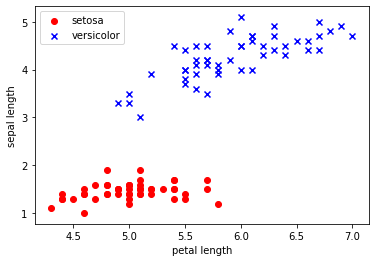

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()


Esse código cria um gráfico, que usualmente é chamado de plot, com os dados do dataset.


Em seguida, para treinar, só precisamos instanciar a classe do Perceptron e executar o método fit passando X e y:

In [9]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

Por fim, treinada a rede, podemos executar alguns códigos para conferir os resultados.

## Resultados
Para ver os resultados, podemos utilizar a função:

In [10]:
def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


Essa função recebe um vetor de inputs, um vetor de rótulos, o classificador (nesse caso o Perceptron), e uma resolução. Depois ela cria uma lista de cores e estilos do scatter do matplotlib e usa o meshgrid do NumPy para gerar uma malha com os pontos do intervalo entre os menores e os maiores valores dos inputs, com a resolução passada por parâmetro. Então a variável Z é criada utilizando previsões do Perceptron com os valores da malha e usa-se a função contourf para colorir os pontos. Após isso, um laço for é criado para gerar o plot com os valores de y.


Então o seguinte código é chamado para exibir o plot na tela:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


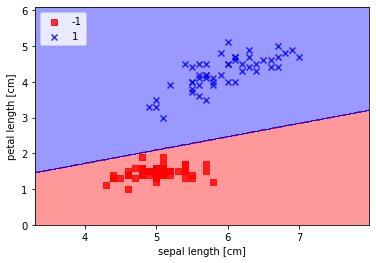

In [11]:
plot_decision_region(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Plotar taxa de erro
Além da função mostrada acima, também podemos visualizar o plot da taxa de erros por época usando o seguinte código:

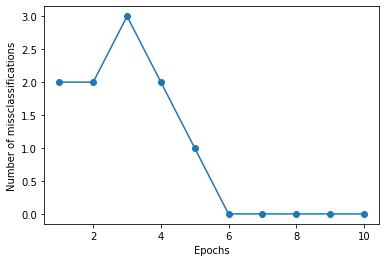

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of missclassifications')
plt.show()

Esse código apenas usa o atributo errors_ que definimos no método fit para armazenar os erros por época e gera um plot com esses dados, mostrando que o erro diminui a cada época, até chegar em 0.

## Conclusão
Com esse pequeno tutorial, vimos um pouco do poder do Perceptron e já conseguimos criar um classificador simples. Existem algumas versões dele mais complexas, com várias camadas de neurônios, além de outros modelos mais avançados, que conseguem realizar tarefas mais sofisticadas, mas que não são o foco desse tutorial. O aprendizado obtido aqui é uma ótima porta de entrada para o estudo de Machine Learning, que é uma área de muito destaque.


Por fim, queremos deixar um agradecimento especial pra Sigmat Jr, que ajudou muito na revisão desse artigo.
Até a próxima!


## Referencias
Sebastian Raschka. Python Machine Learning. September 2015. Link: https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781787125933